# LOAN APPROVAL PREDICTOR USING MACHINE LEARNING

In the project , we will understand how Loan prediction analysis helps to determine whether or not the loan should get approved 
by using specific parameters about a loan application.
Loan Prediction using machine learning tools and techniques can help financial institutions quickly process applications 
by rejecting high-risk customers entirely, accepting worthy customers, and then assigning them to a manual review. 
We have used Classification Algorithms using Supervised Learning to predict the binomiality of Loan Approval [YES/NO].

In [2]:
#import libs
import pandas as pd
import matplotlib.pyplot as plt

#Loading data
data=pd.read_csv("D:\ML 5sept2022\project\lap.csv")

print(data.head())




    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [3]:
#rows x cols
print(data.shape)


(614, 13)


In [4]:
#check for null values

print(data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [3]:
#Info , Dtype

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Data Preprocessing -> used fillna method to fill missing values

data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

data.drop(["Loan_ID"],axis=1,inplace=True)

data["LoanAmount"].fillna(data["LoanAmount"].mean(),inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean(),inplace=True)


In [6]:
print(data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


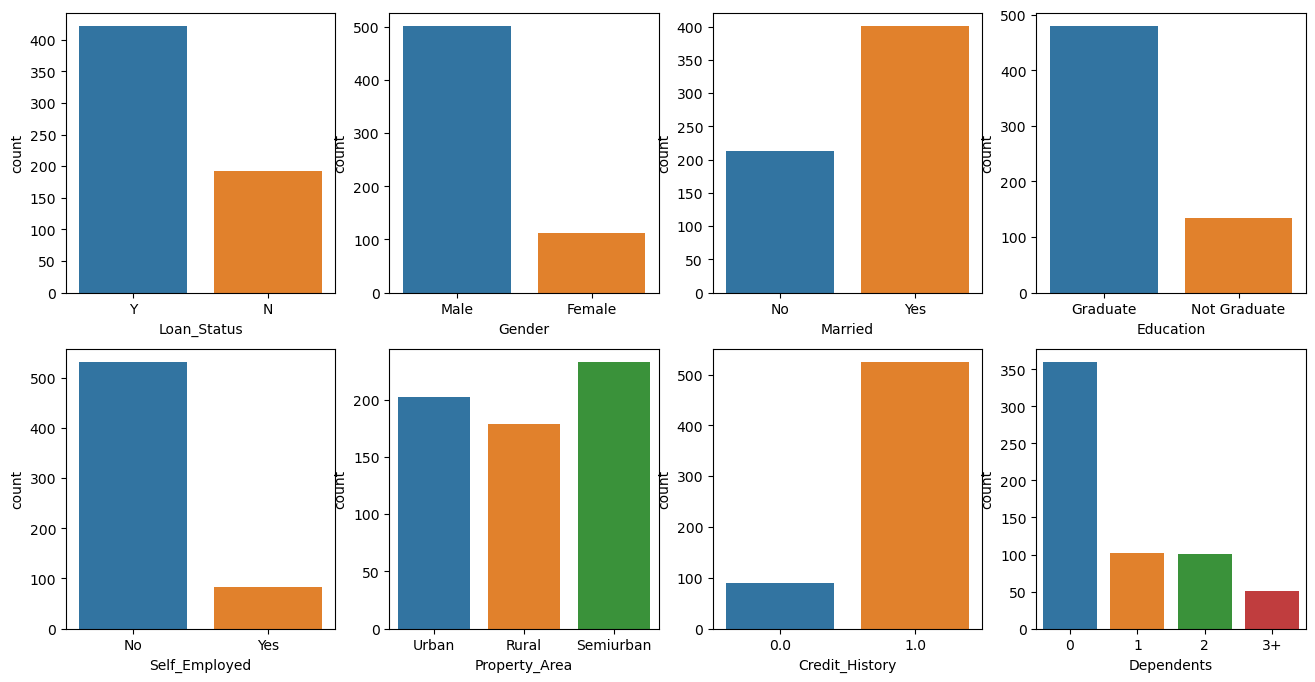

In [8]:
#EXPLORATORY DATA ANALYSIS {UNIVARIATE ANALYSIS}
import seaborn as sns
fig,ax=plt.subplots(2,4,figsize=(16,8))
sns.countplot(x="Loan_Status",data=data,ax=ax[0][0])
sns.countplot(x="Gender",data=data,ax=ax[0][1])
sns.countplot(x="Married",data=data,ax=ax[0][2])
sns.countplot(x="Education",data=data,ax=ax[0][3])
sns.countplot(x="Self_Employed",data=data,ax=ax[1][0])
sns.countplot(x="Property_Area",data=data,ax=ax[1][1])
sns.countplot(x="Credit_History",data=data,ax=ax[1][2])
sns.countplot(x="Dependents",data=data,ax=ax[1][3])
plt.show()

#OBSERVATIONS OF UNIVARIATE ANALYSIS :-

1) More Loans are approved Vs Rejected
2) Count of Male applicants is more than Female
3) Count of Married applicant is more than Non-married
4) Count of graduate is more than non-Graduate
5) Count of self-employed is less than that of Non-Self-employed
6) Maximum properties are located in Semiurban areas
7) Credit History is present for many applicants
8) The count of applicants with several dependents=0 is maximum.



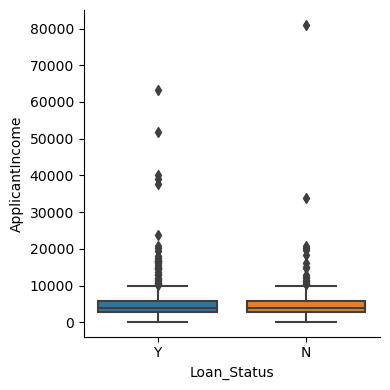

In [35]:
#Bivariate Analysis
sns.catplot(x="Loan_Status",y="ApplicantIncome",kind="box",data=data,height=4, aspect=1)

#OBSERVATION :- Mean ApplicantIncome of MALE and FEMALE are almost the same

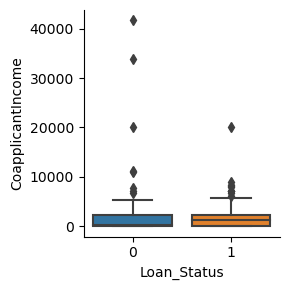

In [56]:
sns.catplot(x="Loan_Status",y="CoapplicantIncome",kind="box",data=data,height=3, aspect=1)

#OBSERVATION :- Mean CoApplicantIncome of MALE is slightly more than FEMALE.

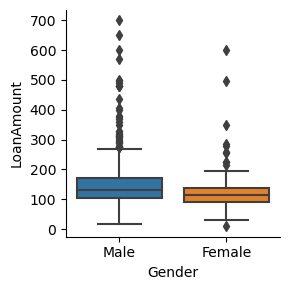

In [41]:
sns.catplot(x="Gender",y="LoanAmount",kind="box",data=data,height=3, aspect=1)

#OBSERVATION :- The mean value of Loan Amount applied by MALE is slightly higher than FEMALE

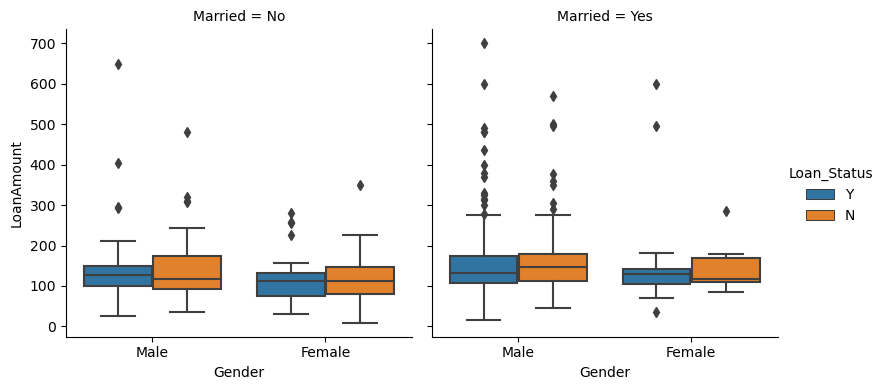

In [39]:
# MULTIVARIATE Analysis using catplot 

sns.catplot(x="Gender",y="LoanAmount",hue='Loan_Status',col='Married',kind="box",data=data,height=4, aspect=1)

#OBSERVATION :- If you are married then the loan amount requested is slightly higher than non-married


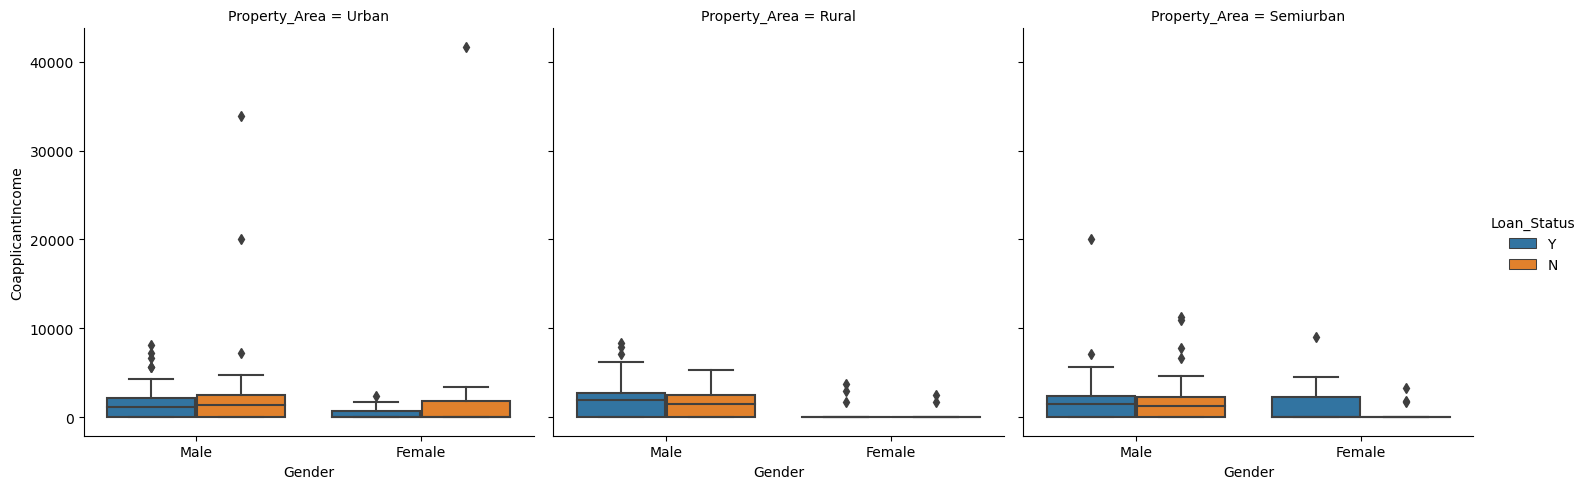

In [40]:
# MULTIVARIATE Analysis using catplot 

sns.catplot(x="Gender",y="CoapplicantIncome",hue="Loan_Status",col='Property_Area',kind="box",data=data)

#OBSERVATION :- Male have higher Co-applicant income than females in all three property areas


In [44]:
# ENCODING CATEGORICAL COLUMNS

data= data.replace({"Gender":{"Male":1, "Female":0 }})
data =data.replace({"Married" :{"Yes":1, "No":0}})
data= data.replace({"Self_Employed":{"Yes":1, "No":0 }})
data= data.replace({"Education":{"Graduate":1, "Not Graduate":0 }})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})
data['Loan_Status'] = data.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)
data['Dependents'] = data['Dependents'].replace('3+', '3')
data['Dependents']=pd.to_numeric(data['Dependents'], errors='coerce')

In [45]:
print(data.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0             5849   
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  
0              1            1  
1              0            0  
2              1    

In [46]:
#CORRELATION MATRIX
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.109521,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.007281,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,0.001601,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.073658,0.066740,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.007124,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.017321,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,-0.019087,-0.059187
LoanAmount,0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.029024,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,0.017349,-0.020974
Credit_History,0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.033102,0.540556


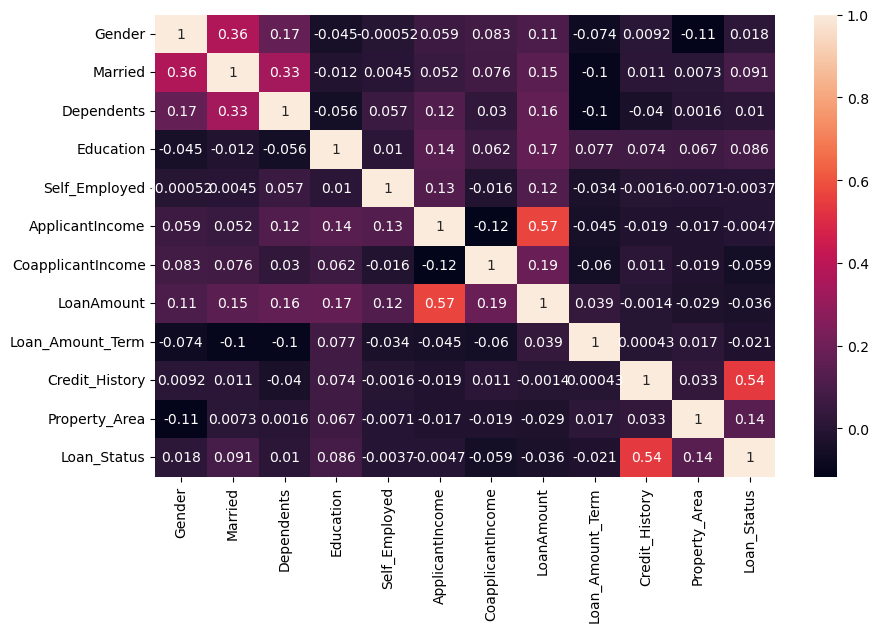

In [47]:
#CORRELATION MATRIX USING HEATMAP
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()


In [48]:
#FEATURE SELECTION

f=data.drop(["Loan_Status"],axis=1)
t=data["Loan_Status"]

In [60]:
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(f,t,test_size=0.2,random_state=11)

In [61]:
#CREATING MODEL + CLASSIFICATION REPORT FOR TRAIN & TEST DATA + MODELACCURACY

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  #CR
from sklearn.metrics import classification_report,plot_confusion_matrix

lc = LogisticRegression()
nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=10)

for clf in (lc,nb,rf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(y_train,y_pred))
    cr=classification_report(y_train,clf.predict(x_train))
    print("Cr for Train :-> \n",cr)
    cr=classification_report(y_test,clf.predict(x_test))
    print("Cr for test :-> \n",cr)
    print('--'*50)
   
    


Accuracy score of  LogisticRegression = 80.04073319755601
Cr for Train :-> 
               precision    recall  f1-score   support

           0       0.86      0.42      0.57       152
           1       0.79      0.97      0.87       339

    accuracy                           0.80       491
   macro avg       0.83      0.70      0.72       491
weighted avg       0.81      0.80      0.78       491

Cr for test :-> 
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        40
           1       0.83      0.95      0.89        83

    accuracy                           0.84       123
   macro avg       0.84      0.78      0.80       123
weighted avg       0.84      0.84      0.83       123

----------------------------------------------------------------------------------------------------
Accuracy score of  GaussianNB = 79.0224032586558
Cr for Train :-> 
               precision    recall  f1-score   support

           0       0.81    

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
mms=MinMaxScaler() #--feature scaling same like PLR , first only transform fetaures 
nf=mms.fit_transform(f)

#calculate N 
N=int(len(data)**0.5)
if N%2==0:
    N=N+1

model=KNeighborsClassifier(n_neighbors=N,metric="euclidean")
model.fit(nf,t)

y_pred = model.predict(x_train)
print("Accuracy score of ",
          model.__class__.__name__,
          "=",100*metrics.accuracy_score(y_train, 
                                         y_pred))


Accuracy score of  KNeighborsClassifier = 69.04276985743381


C:\Users\parimal\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\parimal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[0.01936262 0.02402398 0.05407994 0.02912297 0.02302559 0.18573182
 0.12292412 0.20020615 0.04520553 0.24764033 0.04867695]


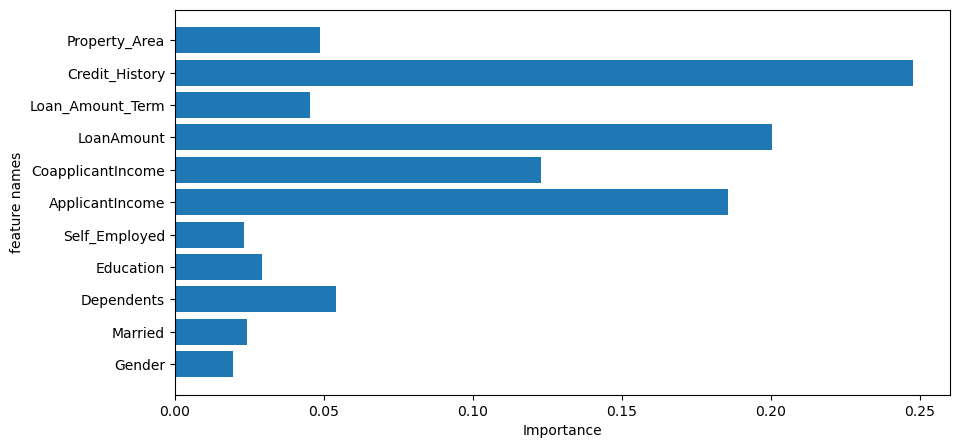

In [54]:
#FEATURE IMPORTANCE FOR RANDOMFORESTCLASSIFIER

print(rf.feature_importances_)
x=f.columns
y=rf.feature_importances_
plt.figure(figsize=(10,5))
plt.barh(x,y)
plt.xlabel("Importance")
plt.ylabel("feature names")
plt.show()


# applicants with very high incomes and co-applicant income with a good credit history 
#have an excellent chance of getting loan approval.

In [ ]:
#CONCLUSION
Out of all models RFC works best for both train and test data.
Accuracy of 98% is achieved which can solve the problem of prediction of Loan approval quickly thereby benefiting the customers.
The application can help in reducing the manual intervention and also reduce processing time.